In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
# from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
def getDataset(file):
    df = pd.read_csv(file, sep='\t')
    return df.iloc[:,5:]

#display(getDataset('master means/26C_mean_masterFile.tsv').head(5))

In [16]:
def getDescriptions(file):
    df = pd.read_csv(file, sep='\t')
    return df.iloc[:, :5]

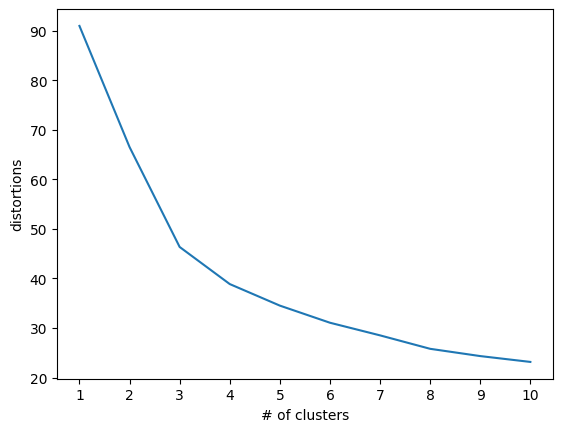

In [39]:
def plotElbow(file):
    dataset = getDataset(file)
    #scale = StandardScaler().fit_transform(dataset) #normalize values
    scale = Normalizer().fit_transform(dataset)
    
    kmeans_kwargs = {
        "init" : "k-means++",
        "random_state" : 1,
        "n_init": 'auto',
        "max_iter": 400
    }

    distortions = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit_transform(scale)
        distortions.append(kmeans.inertia_)
    
    plt.plot(range(1,11), distortions)
    plt.xticks(range(1,11))
    plt.xlabel("# of clusters")
    plt.ylabel("distortions")
    plt.show()

    # km = KMeans(**kmeans_kwargs)
    # vis = KElbowVisualizer(km, k=(1,11))
    # vis.fit(scale)
    # vis.show()

plotElbow('master means/26C_mean_masterFile.tsv')

In [44]:
def cluster(file, n_clusters: int, names: list):
    dataset = getDataset(file).to_numpy()
    scaled_ds = Normalizer().fit_transform(dataset)

    # scaled_ds = dataset

    kmeans_kwargs = {
        "init" : "k-means++",
        "random_state" : 1,
        "n_init": 'auto',
        "max_iter": 400
    }

    kmeans = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    kmeans.fit_transform(scaled_ds)
    y = kmeans.predict(scaled_ds)
    
    normDf = pd.DataFrame(scaled_ds, columns=names)

    df = getDescriptions(file)
    df = pd.concat([df, normDf], axis=1)
    df['cluster'] = y
    
    centers = kmeans.cluster_centers_
    #print(centers)
    x = plt.scatter(df.iloc[:, 5],df.iloc[:, 8], c=df['cluster'], cmap=plt.cm.tab20b)
    x = plt.scatter(df.iloc[:, 6],df.iloc[:, 8], c=df['cluster'], cmap=plt.cm.tab20b)
    x = plt.scatter(df.iloc[:, 7],df.iloc[:, 8], c=df['cluster'], cmap=plt.cm.tab20b)
    #plt.xlim([0,10000])
    #plt.ylim([0,10000])

    # for i in range(3):
    #     plt.scatter(centers[:, 2], centers[:, i], c='black')
    plt.show()


    return df.drop(df.columns[0], axis=1)



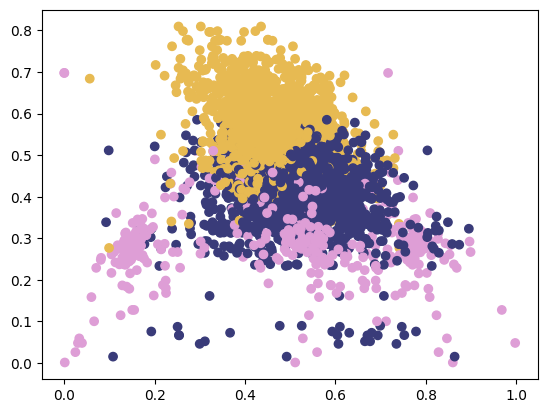

0


,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
0,DN756_00005,dnaA,chromosomal replication initiator protein DnaA,CDS,0.497981,0.495855,0.515261,0.490560,0
1,DN756_00010,NaN,DNA polymerase III subunit beta,CDS,0.479174,0.515046,0.531874,0.471413,0
2,DN756_00020,recF,DNA replication/repair protein RecF,CDS,0.491427,0.485538,0.536741,0.484419,0
3,DN756_00025,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,0.482426,0.508714,0.528685,0.478505,0
4,DN756_00030,NaN,sugar-phosphatase,CDS,0.477137,0.517191,0.544463,0.456524,0
...,...,...,...,...,...,...,...,...,...
3911,DN756_21555,yidD,membrane protein insertion efficiency factor YidD,CDS,0.440987,0.544401,0.629323,0.336319,0
3912,DN756_21560,NaN,ribonuclease P protein component,CDS,0.524505,0.487946,0.558457,0.418245,0
3913,DN756_21565,rpmH,50S ribosomal protein L34,CDS,0.546169,0.505850,0.527744,0.409026,0
3914,DN756_21570,NaN,hypothetical protein,CDS,0.532008,0.457286,0.570597,0.426938,0


1


,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
5,DN756_00035,NaN,hypothetical protein,CDS,0.526492,0.343365,0.431854,0.646845,1
7,DN756_00045,NaN,threonine/serine dehydratase,CDS,0.480110,0.508227,0.483773,0.526462,1
8,DN756_00050,NaN,DUF3748 domain-containing protein,CDS,0.486737,0.503887,0.469223,0.537601,1
9,DN756_00055,NaN,YceK/YidQ family lipoprotein,CDS,0.524954,0.529375,0.435566,0.504447,1
10,DN756_00060,NaN,heat shock protein IbpA,CDS,0.422888,0.339075,0.262653,0.798253,1
...,...,...,...,...,...,...,...,...,...
3895,DN756_21470,pstC,phosphate ABC transporter permease PstC,CDS,0.508377,0.462819,0.399508,0.606419,1
3896,DN756_21475,NaN,phosphate ABC transporter permease,CDS,0.490446,0.493932,0.438150,0.568787,1
3897,DN756_21480,NaN,phosphate ABC transporter ATP-binding protein,CDS,0.510028,0.519351,0.451515,0.516023,1
3898,DN756_21485,phoU,phosphate transport system regulator PhoU,CDS,0.462334,0.531701,0.486743,0.516355,1


2


,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
137,DN756_00745,NaN,IS66 family insertion sequence hypothetical pr...,CDS,0.660977,0.371740,0.536473,0.370291,2
184,DN756_00980,NaN,hypothetical protein,CDS,0.620935,0.395748,0.626617,0.255293,2
597,DN756_03250,NaN,hypothetical protein,CDS,0.738009,0.332692,0.388751,0.439923,2
648,DN756_03570,NaN,tight adherance operon protein,CDS,0.680991,0.406682,0.527173,0.304876,2
679,DN756_03755,NaN,transcriptional regulator,CDS,0.711412,0.395196,0.433301,0.387252,2
...,...,...,...,...,...,...,...,...,...
4001,DN756_22025,NaN,transposase,CDS,0.684117,0.173313,0.661241,0.254373,2
4002,DN756_22030,NaN,tyrosine-protein phosphatase YopH,CDS,0.852370,0.104739,0.440762,0.261197,2
4003,DN756_22035,NaN,IS66 family transposase,CDS,0.730022,0.193901,0.547587,0.360027,2
4004,DN756_22040,NaN,IS3 family transposase,CDS,0.746998,0.225190,0.602402,0.168512,2


In [45]:
names = ['pil', 'pcnB', 'pil-pcnB', 'WT']
df = cluster(file='master means/26C_mean_masterFile.tsv', n_clusters = 3, names=names)
#df.to_csv('test.tsv', sep='\t')
for i in range(3):
    print(i)
    display(df.loc[df['cluster'] == i])

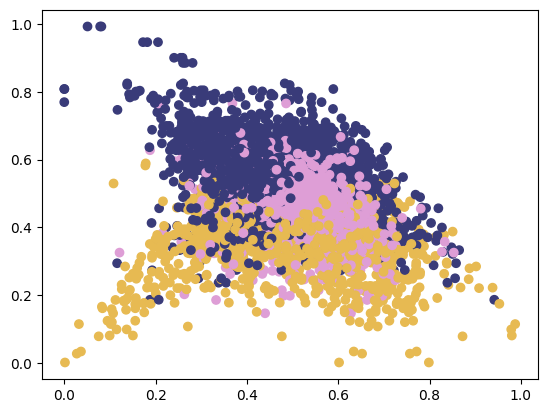

0


,Unnamed: 0,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
0,0,DN756_00005,dnaA,chromosomal replication initiator protein DnaA,CDS,0.428583,0.512903,0.440707,0.599187,0
1,1,DN756_00010,NaN,DNA polymerase III subunit beta,CDS,0.457072,0.525540,0.428210,0.575786,0
2,2,DN756_00020,recF,DNA replication/repair protein RecF,CDS,0.433293,0.568425,0.385573,0.583510,0
3,3,DN756_00025,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,0.450393,0.555285,0.478595,0.509659,0
12,12,DN756_00070,NaN,putative transporter,CDS,0.330025,0.648325,0.326698,0.603346,0
...,...,...,...,...,...,...,...,...,...,...
3911,3911,DN756_21555,yidD,membrane protein insertion efficiency factor YidD,CDS,0.371175,0.582772,0.492132,0.529539,0
3912,3912,DN756_21560,NaN,ribonuclease P protein component,CDS,0.451348,0.530059,0.426714,0.577267,0
3913,3913,DN756_21565,rpmH,50S ribosomal protein L34,CDS,0.450600,0.505950,0.446618,0.584386,0
3914,3914,DN756_21570,NaN,hypothetical protein,CDS,0.366267,0.565100,0.382714,0.632488,0


1


,Unnamed: 0,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
9,9,DN756_00055,NaN,YceK/YidQ family lipoprotein,CDS,0.838309,0.250265,0.385802,0.292851,1
10,10,DN756_00060,NaN,heat shock protein IbpA,CDS,0.568411,0.419709,0.602637,0.370921,1
17,17,DN756_00110,NaN,hypothetical protein,CDS,0.550562,0.396774,0.585247,0.443778,1
21,21,DN756_00130,NaN,hypothetical protein,CDS,0.649275,0.248937,0.606690,0.385227,1
29,29,DN756_00170,NaN,YibL family ribosome-associated protein,CDS,0.637741,0.411609,0.464974,0.455701,1
...,...,...,...,...,...,...,...,...,...,...
4001,4001,DN756_22025,NaN,transposase,CDS,0.681976,0.217080,0.660313,0.227534,1
4002,4002,DN756_22030,NaN,tyrosine-protein phosphatase YopH,CDS,0.755486,0.163159,0.578504,0.260679,1
4003,4003,DN756_22035,NaN,IS66 family transposase,CDS,0.697718,0.130538,0.679804,0.184435,1
4004,4004,DN756_22040,NaN,IS3 family transposase,CDS,0.706588,0.232461,0.637620,0.200338,1


2


,Unnamed: 0,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
4,4,DN756_00030,NaN,sugar-phosphatase,CDS,0.486034,0.485989,0.480273,0.544906,2
5,5,DN756_00035,NaN,hypothetical protein,CDS,0.494929,0.476750,0.602846,0.405378,2
6,6,DN756_00040,NaN,ornithine cyclodeaminase family protein,CDS,0.440150,0.491872,0.580504,0.476808,2
7,7,DN756_00045,NaN,threonine/serine dehydratase,CDS,0.463272,0.478409,0.549126,0.504940,2
8,8,DN756_00050,NaN,DUF3748 domain-containing protein,CDS,0.469400,0.513899,0.543925,0.468740,2
...,...,...,...,...,...,...,...,...,...,...
3906,3906,DN756_21530,NaN,hypothetical protein,CDS,0.609601,0.296663,0.394325,0.620392,2
3907,3907,DN756_21535,NaN,DUF1240 domain-containing protein,CDS,0.329460,0.557921,0.621052,0.440992,2
3908,3908,DN756_21540,fabV,enoyl-[acyl-carrier-protein] reductase FabV,CDS,0.477534,0.547944,0.474473,0.496583,2
3927,3927,DN756_21650,NaN,conjugal transfer protein TraI,CDS,0.523267,0.377221,0.605796,0.465733,2


In [25]:
names = ['pil', 'pcnB', 'pil-pcnB', 'WT']
df = cluster(file='master means/37C_mean_masterFile.tsv', n_clusters = 3, names=names)

for i in range(3):
    print(i)
    display(df.loc[df['cluster'] == i])